In [2]:
import sys 

import matplotlib.pyplot as plt
import numpy as np
import snntorch
import torch
from matplotlib.pyplot import cm
from snntorch import surrogate

sys.path.append('../')
from src import data
from src import plot_params
from src import temporal_correlation as corr
from src.spiking_neural_network import Snn

In [3]:
database = 'mnist'
#_, _, _, _, device = data.set_loader_device(database)
batch_size = 128
(train_set, test_set,
 train_loader, test_loader,
 device) = data.set_loader_device(database)

set_name = 'test_set'
imgs_labels = torch.load(
    f'../data/imgs_labels/{database}_{set_name}_imgs_labels.pth'
)

In [4]:
size_layer = 300
num_units_layers = [784, size_layer, size_layer, 10]
spk_neuron = snntorch.Leaky(
    beta=0.5,
    threshold=1,
    reset_mechanism='subtract',
    spike_grad=surrogate.fast_sigmoid(slope=25)
)

model = Snn(spk_neuron, num_units_layers).to(device=device)
checkpoint = torch.load(
    f'../data/trained_model/{size_layer}_{size_layer}_{database}_snn.pth'
)

In [181]:
media = 0.5
var = 0.15
size = (1, 28, 28)
frames_rand_normal = [torch.normal(mean=media, std=var, size=size)
 for i in range(500)]

frames_rand_uniform = [torch.rand(size=size)
 for i in range(500)]

frames_label = [imgs_labels[str(1)][i]  for i in range(500)]

frames = frames_rand_uniform + frames_label

#frames = frames_rand_normal + frames_rand_uniform
num_frames = len(frames)

In [182]:
frames[0].squeeze().min()

tensor(0.0012)

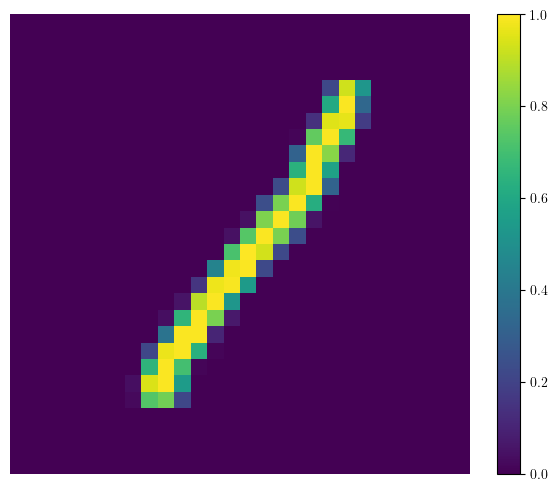

In [183]:
#fig, ax = plt.subplots
plt.imshow(frames[550].squeeze())

plt.axis('off')
plt.colorbar()

#plt.savefig('uniform.pdf')

In [184]:
# Movie presentation.
# checkpoint = {'model_state_dict': model.state_dict()}
layers = model.movie(checkpoint, frames, device)

# Data collection for each layer.
# Number of variables: rho, mem, cur.
num_variable = 3
layer_1 = np.zeros((num_frames, num_variable, model.num_units_layers[1]))
layer_2 = np.zeros((num_frames, num_variable, model.num_units_layers[2]))
layer_3 = np.zeros((num_frames, num_variable, model.num_units_layers[3]))

for t in range(num_frames):
    layer_1[t,:] = layers[t][0][:]
    layer_2[t,:] = layers[t][1][:]
    layer_3[t,:] = layers[t][2][:]

spk_1 = layer_1[:,0,:]
spk_2 = layer_2[:,0,:]
spk_3 = layer_3[:,0,:]
spk = np.stack((spk_1, spk_2))

layer_1_density = np.mean(layer_1, axis=2)
layer_2_density = np.mean(layer_2, axis=2)
layer_3_density = np.mean(layer_3, axis=2)

rho = np.stack(
    (layer_1_density[:,0], layer_2_density[:,0], layer_3_density[:,0])
)
mem = np.stack(
    (layer_1_density[:,1], layer_2_density[:,1], layer_3_density[:,1])
)

In [185]:
lag_max = 75
delta_t = 100
xi_rho_2 = corr.correlation_time(rho[1], rho[1], lag_max, delta_t)
xi_spk_2 = corr.correlation_time(spk[1], spk[1], lag_max, delta_t)
xi_u_2 = corr.correlation_time(mem[1], mem[1], lag_max, delta_t)

xi_rho_1 = corr.correlation_time(rho[0], rho[0], lag_max, delta_t)
xi_spk_1 = corr.correlation_time(spk[0], spk[0], lag_max, delta_t)
xi_u_1 = corr.correlation_time(mem[0], mem[0], lag_max, delta_t)

In [186]:
time = np.arange(num_frames)
colors = ['#1b9e77','#d95f02','#7570b3','#e6ab02']
colors_xi = ['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00','#ffff33']

color_grey = cm.grey(np.linspace(0, 1, 10))
colors_xi = color_grey

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/var/folders/gt/jt78k22s5wn85dcvp1ghmy2r0000gn/T/ipykernel_72677/2644295790.py:155: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  ax_4.annotate(f'(E)', xy=(-0.08, 0.75), xycoords='axes fraction',
/var/folders/gt/jt78k22s5wn85dcvp1ghmy2r0000gn/T/ipykernel_72677/2644295790.py:157: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.savefig('../plots/random_inputs.png', dpi=300)
/Users/jhdesantana/.virtualenvs/master/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  func(*args, **kwargs)
/Users/jhdesantana/.virtualenvs/master/lib/python3.11/site-packages/IPython/core/p

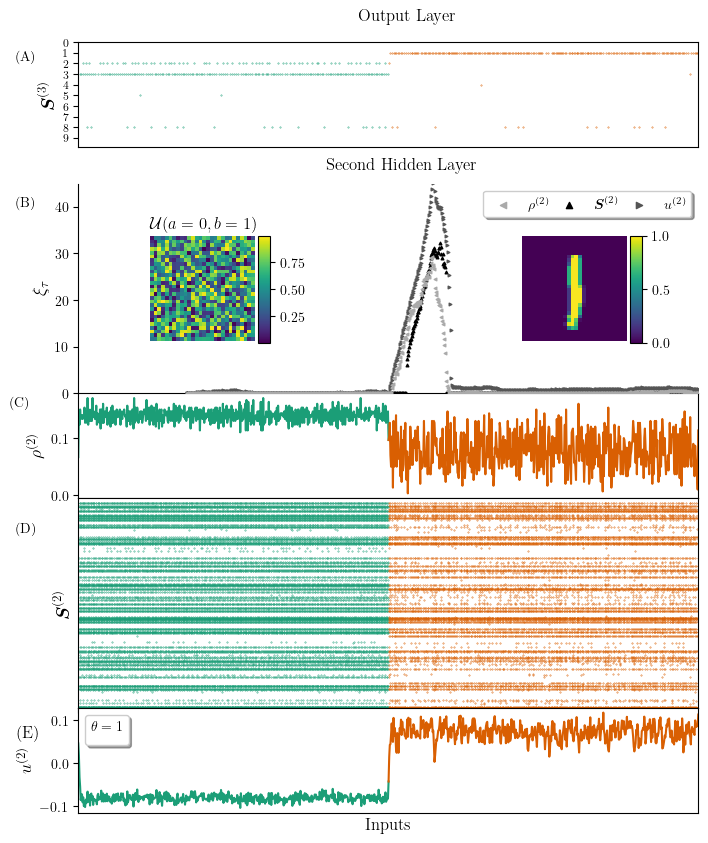

In [189]:
fig = plt.figure(figsize=(8, 16))
grid = plt.GridSpec(
    9, 1,
    # width_ratios=[4, 1],
    height_ratios=[1, 0.35, 2, 1, 2, 1, 1.4, 2, 1],
    hspace=0.0,
    #wspace=0.0)
)
#U_{7}^{(3)
ax_0 = fig.add_subplot(grid[0])

#plot1 = ax_0.plot(rho[2, :501], color=colors[0])
# for i in range(9):
#     plot1 = ax_0.plot(layer_3[:,1,i], color=colors[1])
# plot1 = ax_0.plot(np.arange(497, 1000), layer_3[497:,1,9], color=colors[1])
# plot5 = ax_0.axhline(y=1, color='k', linestyle='--', label=r'$\theta$')

# ax_0.spines[['right', 'top']].set_visible(False)
# ax_0.margins(x=0)
# #ax_0.set_xticks([])
# ax_0.set_xticklabels([])
# ax_0.set_yticks([-1, 0, 1])
# ax_0.set_ylabel(r'$u^{(3)}$', fontsize=13)

ax_0.text(-100, 8.2, '(A)' )
# leg_0 = ax_0.legend(loc='upper center', bbox_to_anchor=(0.5, 1.7), ncol=5)
# leg_0.set_title('Random Inputs', prop={'size':12})
# ax_0.set_xticks([])

n_neurons = 10
for i in range(n_neurons):
    y = (n_neurons - i)
    ax_0.scatter(time[:500], y*spk_3[:500,i], s = 0.1, color=colors[0])
    ax_0.scatter(time[500:1000], y*spk_3[500:1000,i], s = 0.1, color=colors[1])
    ax_0.margins(x=0)

#ax_0.set_yticklabels([])
ax_0.set_ylim([0.15, n_neurons])


ax_0.set_xticklabels([])
#ax_0.set_yticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
ax_0.set_yticks(range(1, 11), reversed(range(10)), fontsize=8)
ax_0.set_xticks([])
ax_0.set_ylabel(r'$\boldsymbol{S}^{(3)}$', fontsize=13)

ax_0.text(450, 12, 'Output Layer', fontsize=12)
###############################################################################
ax_space = fig.add_subplot(grid[1])
ax_space.text(0.4, 0.38, 'Second Hidden Layer', fontsize=12)
ax_space.axis('off')


###############################################################################
ax_2 = fig.add_subplot(grid[3])

ax_2.plot(time[:501], rho[1, :501], color=colors[0])
ax_2.plot(time[500:1001],rho[1, 500:1001], color=colors[1])
#ax_2.plot(time, rho[1], color=colors[0])

ax_2.spines[['top']].set_visible(False)
ax_2.margins(x=0)
ax_2.set_xticks([])
ax_2.set_xticklabels([])
ax_2.set_ylabel(r'$\rho^{(2)}$', fontsize=13)
ax_2.text(-110, 0.155, '(C)' )

##############################################################################
ax_1 = fig.add_subplot(grid[2])

x_shift = np.arange(0+lag_max+delta_t, num_frames)

ax_1.scatter(np.arange(0, num_frames),np.zeros(num_frames), color=colors_xi[9])
ax_1.scatter(x_shift, xi_rho_2, label=r'$\rho^{(2)}$', s=3.5, marker='<', color=colors_xi[6],zorder=3)
ax_1.scatter(x_shift, xi_spk_2, label=r'$\boldsymbol{{S}}^{(2)}$', s=3.5, marker='^', color=colors_xi[0])
ax_1.scatter(x_shift, xi_u_2, label=r'$u^{(2)}$', s=3.5, marker='>',color=colors_xi[3], zorder=2)

#ax_1.scatter(np.arange(0, num_frames),np.zeros(num_frames), color=colors_xi[9])

ax_1.spines[['right', 'top']].set_visible(False)
ax_1.margins(x=0)

ax_1.set_xticklabels([])
ax_1.set_ylabel(r'$\xi_\tau$', fontsize=13)
ax_1.set_xticks([])
# ax_1.set_yticks([30, 90])

# ax_1.tick_params(axis="y",direction="in", pad=-15)
# ax_1.text(90, 90, r'$\xi_\tau$', rotation=90, fontsize=14)
# ax_1.set_xlabel('Inputs', loc='right', labelpad=0.1)
lgnd = ax_1.legend(loc='upper right', ncol=3, columnspacing=0.45)
# ax_1.text(1750, 90, '(H)')

lgnd.legend_handles[0]._sizes = [20]
lgnd.legend_handles[1]._sizes = [20]
lgnd.legend_handles[2]._sizes = [20]
#lgnd.legendHandles[2]._legmarker.set_markersize(6)

ax_1.text(-100, 40, '(B)' )
ax_1.set_ylim([0, 45])

ax_inset_1 = ax_1.inset_axes([0.1, 0.25, 0.2, 0.5])
im_1 = ax_inset_1.imshow(frames[10].squeeze())
#ax_inset_1.set_title(r'$\mathcal{N}(\mu = 0.5,\,\sigma^{2} = 0.15)$')
ax_inset_1.axis('off')
cax = plt.axes((0.35, 0.692, 0.015, 0.067))
plt.colorbar(im_1, ax=ax_inset_1,cax=cax)

ax_inset_2 = ax_1.inset_axes([0.7, 0.25, 0.2, 0.5])
im_2 = ax_inset_2.imshow(frames[510].squeeze())
ax_inset_2.axis('off')
ax_inset_1.set_title(r'$\mathcal{U}(a=0, b=1)$')
cax = plt.axes((0.815, 0.692, 0.015, 0.067))
plt.colorbar(im_2, ax=ax_inset_2, cax=cax)

###############################################################################
ax_3 = fig.add_subplot(grid[4])
#ax_3.text(-200, 200, '(C)' )
#n_neurons = spk_2.shape[1]
n_neurons = 300
for i in range(n_neurons):
    y = (n_neurons - i)
    ax_3.scatter(time[:500], y*spk_2[:500,i], s = 0.1, color=colors[0])
    ax_3.scatter(time[500:1000], y*spk_2[500:1000,i], s = 0.1, color=colors[1])
    # ax_3.scatter(time[500:1000], y*spk_2[500:1000,i], s = 0.1, color=colors[1])
    # ax_3.scatter(time[1000:1500], y*spk_2[1000:1500,i], s = 0.1, color=colors[2])
    # ax_3.scatter(time[1500:], y*spk_2[1500:,i], s = 0.1, color=colors[3])
    ax_3.margins(x=0)

ax_3.set_yticklabels([])
ax_3.set_ylim([0.1, n_neurons])


ax_3.set_xticklabels([])
ax_3.set_yticks([])
ax_3.set_ylabel(r'$\boldsymbol{S}^{(2)}$', fontsize=13)
ax_3.text(-100, 250, '(D)' )
###############################################################################

ax_4 = fig.add_subplot(grid[5])
#ax_4.text(-200, 0.075, '(D)' )
ax_4.plot(time[:501], mem[1,:501], color=colors[0])
ax_4.plot(time[500:1001], mem[1, 500:1001], color=colors[1])
# ax_4.plot(time[1000:1501], mem[1, 1000:1501], color=colors[2])
# ax_4.plot(time[1500:], mem[1, 1500:], color=colors[3])

ax_4.margins(x=0)
#ax_4.spines[['right']].set_visible(False)
ax_4.set_xlabel('Inputs', fontsize=12)
ax_4.set_ylabel('$u^{(2)}$', fontsize=13)
#ax_4.set_xticklabels([])
ax_4.set_xticks([])
ax_4.legend(title=r'$\theta = 1$')

ax_4.annotate(f'(E)', xy=(-0.08, 0.75), xycoords='axes fraction',
            ha='center', va='center', fontsize=12, fontweight='bold', textcoords='offset points')
fig.savefig('../plots/random_inputs.png', dpi=300)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/var/folders/gt/jt78k22s5wn85dcvp1ghmy2r0000gn/T/ipykernel_72677/2682471648.py:155: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  ax_4.annotate(f'(E)', xy=(-0.08, 0.75), xycoords='axes fraction',
/var/folders/gt/jt78k22s5wn85dcvp1ghmy2r0000gn/T/ipykernel_72677/2682471648.py:157: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.savefig('../plots/random_inputs_guass_unif_1_layer.png', dpi=300)
/Users/jhdesantana/.virtualenvs/master/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  func(*args, **kwargs)
/Users/jhdesantana/.virtualenvs/master/lib/python3.11/site-pack

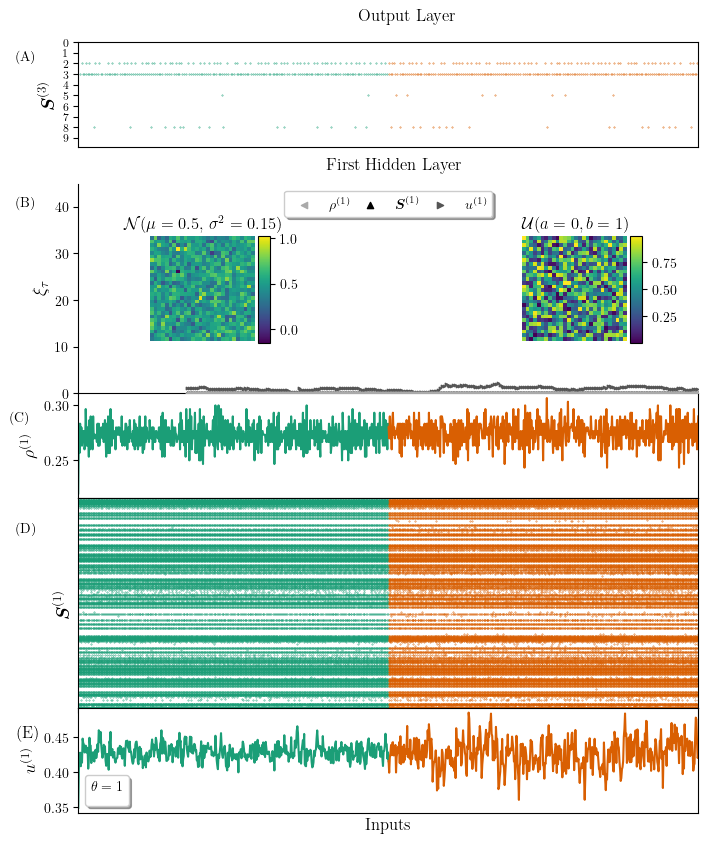

In [169]:
fig = plt.figure(figsize=(8, 16))
grid = plt.GridSpec(
    9, 1,
    # width_ratios=[4, 1],
    height_ratios=[1, 0.35, 2, 1, 2, 1, 1.4, 2, 1],
    hspace=0.0,
    #wspace=0.0)
)
#U_{7}^{(3)
ax_0 = fig.add_subplot(grid[0])

#plot1 = ax_0.plot(rho[2, :501], color=colors[0])
# for i in range(9):
#     plot1 = ax_0.plot(layer_3[:,1,i], color=colors[1])
# plot1 = ax_0.plot(np.arange(497, 1000), layer_3[497:,1,9], color=colors[1])
# plot5 = ax_0.axhline(y=1, color='k', linestyle='--', label=r'$\theta$')

# ax_0.spines[['right', 'top']].set_visible(False)
# ax_0.margins(x=0)
# #ax_0.set_xticks([])
# ax_0.set_xticklabels([])
# ax_0.set_yticks([-1, 0, 1])
# ax_0.set_ylabel(r'$u^{(3)}$', fontsize=13)

ax_0.text(-100, 8.2, '(A)' )
# leg_0 = ax_0.legend(loc='upper center', bbox_to_anchor=(0.5, 1.7), ncol=5)
# leg_0.set_title('Random Inputs', prop={'size':12})
# ax_0.set_xticks([])

n_neurons = 10
for i in range(n_neurons):
    y = (n_neurons - i)
    ax_0.scatter(time[:500], y*spk_3[:500,i], s = 0.1, color=colors[0])
    ax_0.scatter(time[500:1000], y*spk_3[500:1000,i], s = 0.1, color=colors[1])
    ax_0.margins(x=0)

#ax_0.set_yticklabels([])
ax_0.set_ylim([0.15, n_neurons])


ax_0.set_xticklabels([])
#ax_0.set_yticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
ax_0.set_yticks(range(1, 11), reversed(range(10)), fontsize=8)
ax_0.set_xticks([])
ax_0.set_ylabel(r'$\boldsymbol{S}^{(3)}$', fontsize=13)

ax_0.text(450, 12, 'Output Layer', fontsize=12)
###############################################################################
ax_space = fig.add_subplot(grid[1])
ax_space.text(0.4, 0.38, 'First Hidden Layer', fontsize=12)
ax_space.axis('off')


###############################################################################
ax_2 = fig.add_subplot(grid[3])

ax_2.plot(time[:501], rho[0, :501], color=colors[0])
ax_2.plot(time[500:1001],rho[0, 500:1001], color=colors[1])
#ax_2.plot(time, rho[1], color=colors[0])

ax_2.spines[['top']].set_visible(False)
ax_2.margins(x=0)
ax_2.set_xticks([])
ax_2.set_xticklabels([])
ax_2.set_ylabel(r'$\rho^{(1)}$', fontsize=13)
ax_2.text(-110, 0.285, '(C)' )

##############################################################################
ax_1 = fig.add_subplot(grid[2])

x_shift = np.arange(0+lag_max+delta_t, num_frames)

ax_1.scatter(np.arange(0, num_frames),np.zeros(num_frames), color=colors_xi[9])
ax_1.scatter(x_shift, xi_rho_1, label=r'$\rho^{(1)}$', s=3, marker='<', color=colors_xi[6],zorder=3)
ax_1.scatter(x_shift, xi_spk_1, label=r'$\boldsymbol{{S}}^{(1)}$', s=3, marker='^', color=colors_xi[0])
ax_1.scatter(x_shift[::3], xi_u_1[::3], label=r'$u^{(1)}$', s=3, marker='>',color=colors_xi[3], zorder=2)

#ax_1.scatter(np.arange(0, num_frames),np.zeros(num_frames), color=colors_xi[9])

ax_1.spines[['right', 'top']].set_visible(False)
ax_1.margins(x=0)

ax_1.set_xticklabels([])
ax_1.set_ylabel(r'$\xi_\tau$', fontsize=13)
ax_1.set_xticks([])
# ax_1.set_yticks([30, 90])

# ax_1.tick_params(axis="y",direction="in", pad=-15)
# ax_1.text(90, 90, r'$\xi_\tau$', rotation=90, fontsize=14)
# ax_1.set_xlabel('Inputs', loc='right', labelpad=0.1)
lgnd = ax_1.legend(loc='upper center', ncol=3, columnspacing=0.45)
# ax_1.text(1750, 90, '(H)')

lgnd.legend_handles[0]._sizes = [20]
lgnd.legend_handles[1]._sizes = [20]
lgnd.legend_handles[2]._sizes = [20]
#lgnd.legendHandles[2]._legmarker.set_markersize(6)

ax_1.text(-100, 40, '(B)' )
ax_1.set_ylim([0, 45])

ax_inset_1 = ax_1.inset_axes([0.1, 0.25, 0.2, 0.5])
im_1 = ax_inset_1.imshow(frames[10].squeeze())
ax_inset_1.set_title(r'$\mathcal{N}(\mu = 0.5,\,\sigma^{2} = 0.15)$')
ax_inset_1.axis('off')
cax = plt.axes((0.35, 0.692, 0.015, 0.067))
plt.colorbar(im_1, ax=ax_inset_1,cax=cax)

ax_inset_2 = ax_1.inset_axes([0.7, 0.25, 0.2, 0.5])
im_2 = ax_inset_2.imshow(frames[510].squeeze())
ax_inset_2.axis('off')
ax_inset_2.set_title(r'$\mathcal{U}(a=0, b=1)$')
cax = plt.axes((0.815, 0.692, 0.015, 0.067))
plt.colorbar(im_2, ax=ax_inset_2, cax=cax)

###############################################################################
ax_3 = fig.add_subplot(grid[4])
#ax_3.text(-200, 200, '(C)' )
#n_neurons = spk_2.shape[1]
n_neurons = 300
for i in range(n_neurons):
    y = (n_neurons - i)
    ax_3.scatter(time[:500], y*spk_1[:500,i], s = 0.1, color=colors[0])
    ax_3.scatter(time[500:1000], y*spk_1[500:1000,i], s = 0.1, color=colors[1])
    # ax_3.scatter(time[500:1000], y*spk_2[500:1000,i], s = 0.1, color=colors[1])
    # ax_3.scatter(time[1000:1500], y*spk_2[1000:1500,i], s = 0.1, color=colors[2])
    # ax_3.scatter(time[1500:], y*spk_2[1500:,i], s = 0.1, color=colors[3])
    ax_3.margins(x=0)

ax_3.set_yticklabels([])
ax_3.set_ylim([0.1, n_neurons])


ax_3.set_xticklabels([])
ax_3.set_yticks([])
ax_3.set_ylabel(r'$\boldsymbol{S}^{(1)}$', fontsize=13)
ax_3.text(-100, 250, '(D)' )
###############################################################################

ax_4 = fig.add_subplot(grid[5])
#ax_4.text(-200, 0.075, '(D)' )
ax_4.plot(time[:501], mem[0,:501], color=colors[0])
ax_4.plot(time[500:1001], mem[0, 500:1001], color=colors[1])
# ax_4.plot(time[1000:1501], mem[1, 1000:1501], color=colors[2])
# ax_4.plot(time[1500:], mem[1, 1500:], color=colors[3])

ax_4.margins(x=0)
#ax_4.spines[['right']].set_visible(False)
ax_4.set_xlabel('Inputs', fontsize=12)
ax_4.set_ylabel('$u^{(1)}$', fontsize=13)
#ax_4.set_xticklabels([])
ax_4.set_xticks([])
ax_4.legend(title=r'$\theta = 1$')

ax_4.annotate(f'(E)', xy=(-0.08, 0.75), xycoords='axes fraction',
            ha='center', va='center', fontsize=12, fontweight='bold', textcoords='offset points')
fig.savefig('../plots/random_inputs_guass_unif_1_layer.png', dpi=300)
